In [1]:
pip install open-clip-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [2]:
# 1️⃣  Install deps (first run only) ------------------------------------------
# (comment these out after the runtime already has the wheels cached)
!pip install -q --upgrade git+https://github.com/jwyang/transformers.git@dev/jwyang-v4.48.2 \
                      torchvision Pillow open_clip_torch reportlab


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 15.9 MB/s et

In [6]:
# ╔══════════════════════════════════════════════════════════════════════╗
# ║  Magma-8B Real Navigation Testing Framework                          ║
# ║  Using HuggingFace Transformers                                      ║
# ╚══════════════════════════════════════════════════════════════════════╝

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict
import time
import re
from PIL import Image
import torch
from transformers import AutoModelForCausalLM, AutoProcessor
from typing import Dict, List, Tuple, Optional

# 🧪 Test Configuration - REAL PROMPTS FOR NAVIGATION
TEST_PROMPTS = [
    "navigate to the kitchen",
    "go towards the sofa",
    "move to the dining table",
    "approach the bookshelf",
    "walk to the window",
    "head to the bedroom door",
    "go near the television",
    "move towards the stairs"
]

TECHNIQUES = ["standard", "cot", "cod", "cot_consistency"]

# 📊 Evaluation Metrics - OBJECTIVE ANALYSIS ONLY
class NavigationEvaluator:
    def __init__(self):
        self.action_keywords = {
            'movement': ['go', 'move', 'walk', 'approach', 'head', 'navigate', 'turn', 'step'],
            'direction': ['left', 'right', 'forward', 'backward', 'towards', 'to', 'near'],
            'spatial': ['door', 'table', 'chair', 'sofa', 'kitchen', 'bedroom', 'window', 'stairs'],
            'safety': ['avoid', 'careful', 'slowly', 'check', 'safe', 'obstacle', 'clear']
        }

    def evaluate_response(self, response: str, target_prompt: str) -> Dict:
        """Evaluate actual Magma-8B response objectively."""
        response_lower = response.lower()
        prompt_lower = target_prompt.lower()

        # 1. Action Word Count
        action_count = sum(1 for word in self.action_keywords['movement'] if word in response_lower)

        # 2. Direction Word Count
        direction_count = sum(1 for word in self.action_keywords['direction'] if word in response_lower)

        # 3. Spatial Reference Count
        spatial_count = sum(1 for word in self.action_keywords['spatial'] if word in response_lower)

        # 4. Safety Mention Count
        safety_count = sum(1 for word in self.action_keywords['safety'] if word in response_lower)

        # 5. Response Length Metrics
        word_count = len(response.split())
        char_count = len(response)

        # 6. Prompt Keyword Overlap
        prompt_words = set(prompt_lower.split())
        response_words = set(response_lower.split())
        overlap_count = len(prompt_words.intersection(response_words))

        # 7. Sentence Structure
        sentence_count = response.count('.') + response.count('!') + response.count('?')
        if sentence_count == 0:
            sentence_count = 1  # At least one sentence

        # 8. Numerical References (distances, steps, etc.)
        numerical_refs = len(re.findall(r'\d+', response))

        return {
            'action_words': action_count,
            'direction_words': direction_count,
            'spatial_words': spatial_count,
            'safety_words': safety_count,
            'word_count': word_count,
            'char_count': char_count,
            'prompt_overlap': overlap_count,
            'sentence_count': sentence_count,
            'numerical_refs': numerical_refs,
            'avg_words_per_sentence': round(word_count / sentence_count, 2)
        }

# 🤖 Magma-8B Hugging Face Integration Class
class MagmaNavigationHF:
    def __init__(self):
        """Initialize Magma-8B model using Hugging Face transformers."""
        print("🚀 Loading Magma-8B model from Hugging Face...")

        self.dtype = torch.bfloat16
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        try:
            # Load model and processor
            self.model = AutoModelForCausalLM.from_pretrained(
                "microsoft/Magma-8B",
                trust_remote_code=True,
                torch_dtype=self.dtype
            )
            self.processor = AutoProcessor.from_pretrained(
                "microsoft/Magma-8B",
                trust_remote_code=True
            )
            self.model.to(self.device)
            print(f"✅ Model loaded successfully on {self.device}")

        except Exception as e:
            print(f"❌ Error loading model: {e}")
            raise e

    def magma_analyse(self, image: Image.Image, prompt: str, flavour: str = "standard") -> str:
        """Generate navigation response using real Magma-8B model."""

        # Prepare the prompt based on technique
        if flavour == "cot":
            full_prompt = f"Think step by step about how to {prompt}. First, analyze the scene, then plan the navigation route, and finally provide clear instructions."
        elif flavour == "cod":
            full_prompt = f"Break down the task to {prompt} into smaller steps: 1) Identify current location, 2) Locate target, 3) Plan path, 4) Execute movement."
        elif flavour == "cot_consistency":
            # For consistency, we'll generate multiple samples
            return self._consistency_sampling(image, prompt)
        else:  # standard
            full_prompt = prompt

        try:
            # Prepare conversation format
            convs = [
                {"role": "system", "content": "You are a navigation agent that can see and provide movement instructions."},
                {"role": "user", "content": f"<image_start><image><image_end>\n{full_prompt}"},
            ]

            # Process inputs
            prompt_text = self.processor.tokenizer.apply_chat_template(
                convs, tokenize=False, add_generation_prompt=True
            )

            inputs = self.processor(images=[image], texts=prompt_text, return_tensors="pt")
            inputs['pixel_values'] = inputs['pixel_values'].unsqueeze(0)
            inputs['image_sizes'] = inputs['image_sizes'].unsqueeze(0)
            inputs = inputs.to(self.device).to(self.dtype)

            # Generation parameters
            generation_args = {
                "max_new_tokens": 128,
                "temperature": 0.1 if flavour != "cot_consistency" else 0.7,
                "do_sample": flavour == "cot_consistency",
                "use_cache": True,
                "num_beams": 1,
            }

            # Generate response
            with torch.inference_mode():
                generate_ids = self.model.generate(**inputs, **generation_args)

            # Decode response
            generate_ids = generate_ids[:, inputs["input_ids"].shape[-1]:]
            response = self.processor.decode(generate_ids[0], skip_special_tokens=True).strip()

            return response

        except Exception as e:
            print(f"❌ Error generating response: {e}")
            raise e

    def _consistency_sampling(self, image: Image.Image, prompt: str, num_samples: int = 5) -> Tuple[str, List[str]]:
        """Generate multiple samples for self-consistency."""
        samples = []

        for i in range(num_samples):
            try:
                sample = self.magma_analyse(image, prompt, "standard")
                samples.append(sample)
                print(f"  Generated sample {i+1}/{num_samples}")
            except Exception as e:
                print(f"  Error in sample {i+1}: {e}")
                continue

        if not samples:
            raise Exception("No successful samples generated for consistency check")

        # Simple majority voting - in practice, you might want more sophisticated consistency checking
        # For now, we'll return the longest response as it likely contains more reasoning
        majority_response = max(samples, key=len)
        return majority_response, samples

# 🎯 Testing Function
def run_real_navigation_tests(image_path: str, num_trials: int = 3):
    """Run tests using Magma-8B responses."""

    # Load the actual image
    try:
        image = Image.open(image_path).convert("RGB")
        print(f"✅ Loaded image: {image_path}")
        print(f"   Image size: {image.size}")
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return None

    # Initialize model and evaluator
    try:
        magma_model = MagmaNavigationHF()
        evaluator = NavigationEvaluator()
    except Exception as e:
        print(f"❌ Error initializing model: {e}")
        return None

    results = []

    print("🧪 Starting REAL Navigation Performance Tests...")
    print(f"Testing {len(TEST_PROMPTS)} prompts × {len(TECHNIQUES)} techniques × {num_trials} trials")
    print("=" * 70)

    test_count = 0
    total_tests = len(TEST_PROMPTS) * len(TECHNIQUES) * num_trials

    for prompt in TEST_PROMPTS:
        print(f"\n🎯 Testing prompt: '{prompt}'")

        for technique in TECHNIQUES:
            print(f"  ⚙️  {technique.upper()}...", end=" ")

            technique_scores = []

            for trial in range(num_trials):
                test_count += 1
                start_time = time.time()

                try:
                    #  MAGMA-8B CALL
                    if technique == "cot_consistency":
                        response, all_samples = magma_model.magma_analyse(image, prompt, flavour=technique)
                        execution_time = time.time() - start_time

                        # Evaluate the majority response
                        metrics = evaluator.evaluate_response(response, prompt)

                        result = {
                            'prompt': prompt,
                            'technique': technique,
                            'trial': trial + 1,
                            'response': response,
                            'all_samples': all_samples,
                            'sample_count': len(all_samples),
                            'execution_time': execution_time,
                            **metrics
                        }

                    else:
                        response = magma_model.magma_analyse(image, prompt, flavour=technique)
                        execution_time = time.time() - start_time

                        # Evaluate single response
                        metrics = evaluator.evaluate_response(response, prompt)

                        result = {
                            'prompt': prompt,
                            'technique': technique,
                            'trial': trial + 1,
                            'response': response,
                            'execution_time': execution_time,
                            **metrics
                        }

                    results.append(result)
                    technique_scores.append(metrics['word_count'])  # Use word count as quick metric

                    print(f"✓", end="")

                except Exception as e:
                    print(f"\n❌ Error in {technique} trial {trial+1}: {e}")
                    continue

            if technique_scores:
                avg_words = np.mean(technique_scores)
                print(f" Avg words: {avg_words:.1f} ({test_count}/{total_tests})")

    print(f"\n✅ Completed {len(results)} real tests")

    # Clean up GPU memory
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    return pd.DataFrame(results)

# 📈 REAL Statistical Analysis
def analyze_real_results(df):
    """Analyze Magma-8B performance data."""

    if df is None or df.empty:
        print("❌ No data to analyze")
        return None, None

    print("\n" + "=" * 70)
    print("📊 MAGMA-8B PERFORMANCE ANALYSIS")
    print("=" * 70)

    # 1. Response Characteristics by Technique
    print("\n1️⃣  RESPONSE CHARACTERISTICS BY TECHNIQUE")
    print("-" * 50)

    char_stats = df.groupby('technique').agg({
        'word_count': ['mean', 'std', 'min', 'max'],
        'action_words': 'mean',
        'direction_words': 'mean',
        'spatial_words': 'mean',
        'safety_words': 'mean',
        'sentence_count': 'mean',
        'execution_time': 'mean',
        'numerical_refs': 'mean'
    }).round(3)

    print(char_stats)

    # 2. Response Length Statistical Test
    print("\n2️⃣  RESPONSE LENGTH ANALYSIS (One-way ANOVA)")
    print("-" * 50)

    length_groups = [group['word_count'].values for name, group in df.groupby('technique')]
    if len(length_groups) > 1 and all(len(g) > 0 for g in length_groups):
        f_stat, p_value = stats.f_oneway(*length_groups)

        print(f"F-statistic: {f_stat:.4f}")
        print(f"P-value: {p_value:.6f}")
        print(f"Significant difference in response lengths: {'Yes' if p_value < 0.05 else 'No'}")
    else:
        print("Insufficient data for ANOVA test")

    # 3. Execution Time Analysis
    print("\n3️⃣  EXECUTION TIME COMPARISON")
    print("-" * 50)

    time_stats = df.groupby('technique')['execution_time'].agg(['mean', 'std']).round(3)
    time_stats['efficiency_rank'] = time_stats['mean'].rank()

    print(time_stats)

    # 4. Content Analysis
    print("\n4️⃣  CONTENT ANALYSIS")
    print("-" * 50)

    content_analysis = df.groupby('technique').agg({
        'action_words': 'sum',
        'direction_words': 'sum',
        'spatial_words': 'sum',
        'safety_words': 'sum'
    })

    # Calculate percentages
    total_responses = df.groupby('technique').size()
    content_percentages = content_analysis.div(total_responses, axis=0) * 100

    print("Average words per response type:")
    print(content_percentages.round(2))

    # 5. Consistency Analysis (for cot_consistency technique)
    if 'sample_count' in df.columns:
        consistency_data = df[df['technique'] == 'cot_consistency']
        if not consistency_data.empty:
            print("\n5️⃣  SELF-CONSISTENCY ANALYSIS")
            print("-" * 50)
            avg_samples = consistency_data['sample_count'].mean()
            print(f"Average samples per consistency test: {avg_samples:.1f}")

    return char_stats, time_stats

# 📊 REAL Data Visualization
def plot_real_results(df):
    """Create plots from Magma-8B data."""

    if df is None or df.empty:
        print("❌ No data to plot")
        return None

    plt.style.use('default')
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Magma-8B Navigation Performance Analysis', fontsize=16, fontweight='bold')

    # 1. Response Length Distribution
    df.boxplot(column='word_count', by='technique', ax=axes[0,0])
    axes[0,0].set_title('Response Length by Technique')
    axes[0,0].set_ylabel('Word Count')

    # 2. Execution Time Comparison
    technique_times = df.groupby('technique')['execution_time'].mean()
    axes[0,1].bar(technique_times.index, technique_times.values)
    axes[0,1].set_title('Average Execution Time')
    axes[0,1].set_ylabel('Time (seconds)')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Word Type Analysis
    word_columns = ['action_words', 'direction_words', 'spatial_words', 'safety_words']
    word_data = df.groupby('technique')[word_columns].mean()

    word_data.plot(kind='bar', ax=axes[0,2], stacked=True)
    axes[0,2].set_title('Word Type Distribution')
    axes[0,2].set_ylabel('Average Count')
    axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 4. Response Length vs Execution Time
    axes[1,0].scatter(df['word_count'], df['execution_time'], alpha=0.6)
    axes[1,0].set_xlabel('Word Count')
    axes[1,0].set_ylabel('Execution Time (s)')
    axes[1,0].set_title('Response Length vs Execution Time')

    # 5. Technique Performance Heatmap
    metrics_for_heatmap = ['action_words', 'direction_words', 'spatial_words', 'safety_words']
    heatmap_data = df.groupby('technique')[metrics_for_heatmap].mean()

    sns.heatmap(heatmap_data.T, annot=True, cmap='YlOrRd', ax=axes[1,1])
    axes[1,1].set_title('Content Analysis Heatmap')

    # 6. Prompt-specific Performance
    prompt_perf = df.groupby(['technique', 'prompt'])['word_count'].mean().reset_index()
    pivot_prompt = prompt_perf.pivot(index='prompt', columns='technique', values='word_count')

    sns.heatmap(pivot_prompt, annot=True, cmap='viridis', ax=axes[1,2])
    axes[1,2].set_title('Response Length by Prompt')
    axes[1,2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    return fig

# 🚀 Main Function for Real Testing
def conduct_real_study(image_path: str, trials: int = 3):
    """Conduct complete study with actual Magma-8B."""

    print("🎯  MAGMA-8B NAVIGATION STUDY")
    print("📸 Using your uploaded image")
    print("🔬 Generating GENUINE performance data with Hugging Face")
    print("=" * 70)

    # Run real tests
    results_df = run_real_navigation_tests(image_path, trials)

    if results_df is None or results_df.empty:
        print("❌ No results generated. Check your setup.")
        return None

    # Analyze results
    char_analysis, time_analysis = analyze_real_results(results_df)

    # Plot real data
    plots = plot_real_results(results_df)

    # Save real results
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f'Magma_results_{timestamp}.csv'
    results_df.to_csv(csv_filename, index=False)

    print(f"\n💾 Real results saved to '{csv_filename}'")
    print(f"📊 Total genuine tests: {len(results_df)}")

    # Summary
    print("\n" + "=" * 70)
    print("📝  DATA SUMMARY FOR ACADEMIC REPORT")
    print("=" * 70)

    if not results_df.empty:
        fastest_technique = time_analysis['mean'].idxmin()
        most_verbose = results_df.groupby('technique')['word_count'].mean().idxmax()
        most_concise = results_df.groupby('technique')['word_count'].mean().idxmin()

        print(f"⚡ Fastest technique: {fastest_technique}")
        print(f"📝 Most verbose: {most_verbose}")
        print(f"🎯 Most concise: {most_concise}")
        print(f"📈 Word count range: {results_df['word_count'].min()} - {results_df['word_count'].max()}")
        print(f"⏱️  Time range: {results_df['execution_time'].min():.2f}s - {results_df['execution_time'].max():.2f}s")

    return results_df, char_analysis, time_analysis

# 👉 TO USE THIS FOR TESTING:
if __name__ == "__main__":
    print("🚀 Real Magma-8B Navigation Testing Framework Ready!")
    print("\nTo run with your image:")
    print("results, char_stats, time_stats = conduct_real_study('your_image.jpg', trials=3)")
    print("\n⚠️  This will use Magma-8B model calls")
    print("\n📋 Usage Examples:")
    print("# Basic usage")
    print("results = conduct_real_study('home.jpg', trials=2)")
    print("\n# More comprehensive testing")
    print("results = conduct_real_study('home.jpg', trials=5)")

🚀 Real Magma-8B Navigation Testing Framework Ready!

To run with your image:
results, char_stats, time_stats = conduct_real_study('your_image.jpg', trials=3)

⚠️  This will use Magma-8B model calls

📋 Usage Examples:
# Basic usage
results = conduct_real_study('home.jpg', trials=2)

# More comprehensive testing
results = conduct_real_study('home.jpg', trials=5)


🎯 REAL MAGMA-8B NAVIGATION STUDY
📸 Using your uploaded image
🔬 Generating GENUINE performance data with Hugging Face
✅ Loaded image: /content/appr.jpg
   Image size: (6004, 4005)
🚀 Loading Magma-8B model from Hugging Face...


config.json:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

configuration_magma.py:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Magma-8B:
- configuration_magma.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_magma.py:   0%|          | 0.00/75.6k [00:00<?, ?B/s]

image_tower_magma.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Magma-8B:
- image_tower_magma.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Magma-8B:
- modeling_magma.py
- image_tower_magma.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/70.3k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.91G [00:00<?, ?B/s]

open_clip_pytorch_model.bin:   0%|          | 0.00/4.80G [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of MagmaForCausalLM were not initialized from the model checkpoint at microsoft/Magma-8B and are newly initialized: ['vision_tower.clip_vision_model.head.proj.weight', 'vision_tower.clip_vision_model.trunk.head.norm.bias', 'vision_tower.clip_vision_model.trunk.head.norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

processing_magma.py:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Magma-8B:
- processing_magma.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


image_processing_magma.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

✅ Model loaded successfully on cuda
🧪 Starting REAL Navigation Performance Tests...
Testing 8 prompts × 4 techniques × 3 trials

🎯 Testing prompt: 'navigate to the kitchen'
  ⚙️  STANDARD... 

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
The `seen_tokens` attribute is deprecated and will b

✓✓✓ Avg words: 111.0 (3/96)
  ⚙️  COT... ✓✓✓ Avg words: 108.0 (6/96)
  ⚙️  COD... ✓✓✓ Avg words: 5.0 (9/96)
  ⚙️  COT_CONSISTENCY...   Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓ Avg words: 111.0 (12/96)

🎯 Testing prompt: 'go towards the sofa'
  ⚙️  STANDARD... ✓✓✓ Avg words: 106.0 (15/96)
  ⚙️  COT... ✓✓✓ Avg words: 110.0 (18/96)
  ⚙️  COD... ✓✓✓ Avg words: 3.0 (21/96)
  ⚙️  COT_CONSISTENCY...   Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3

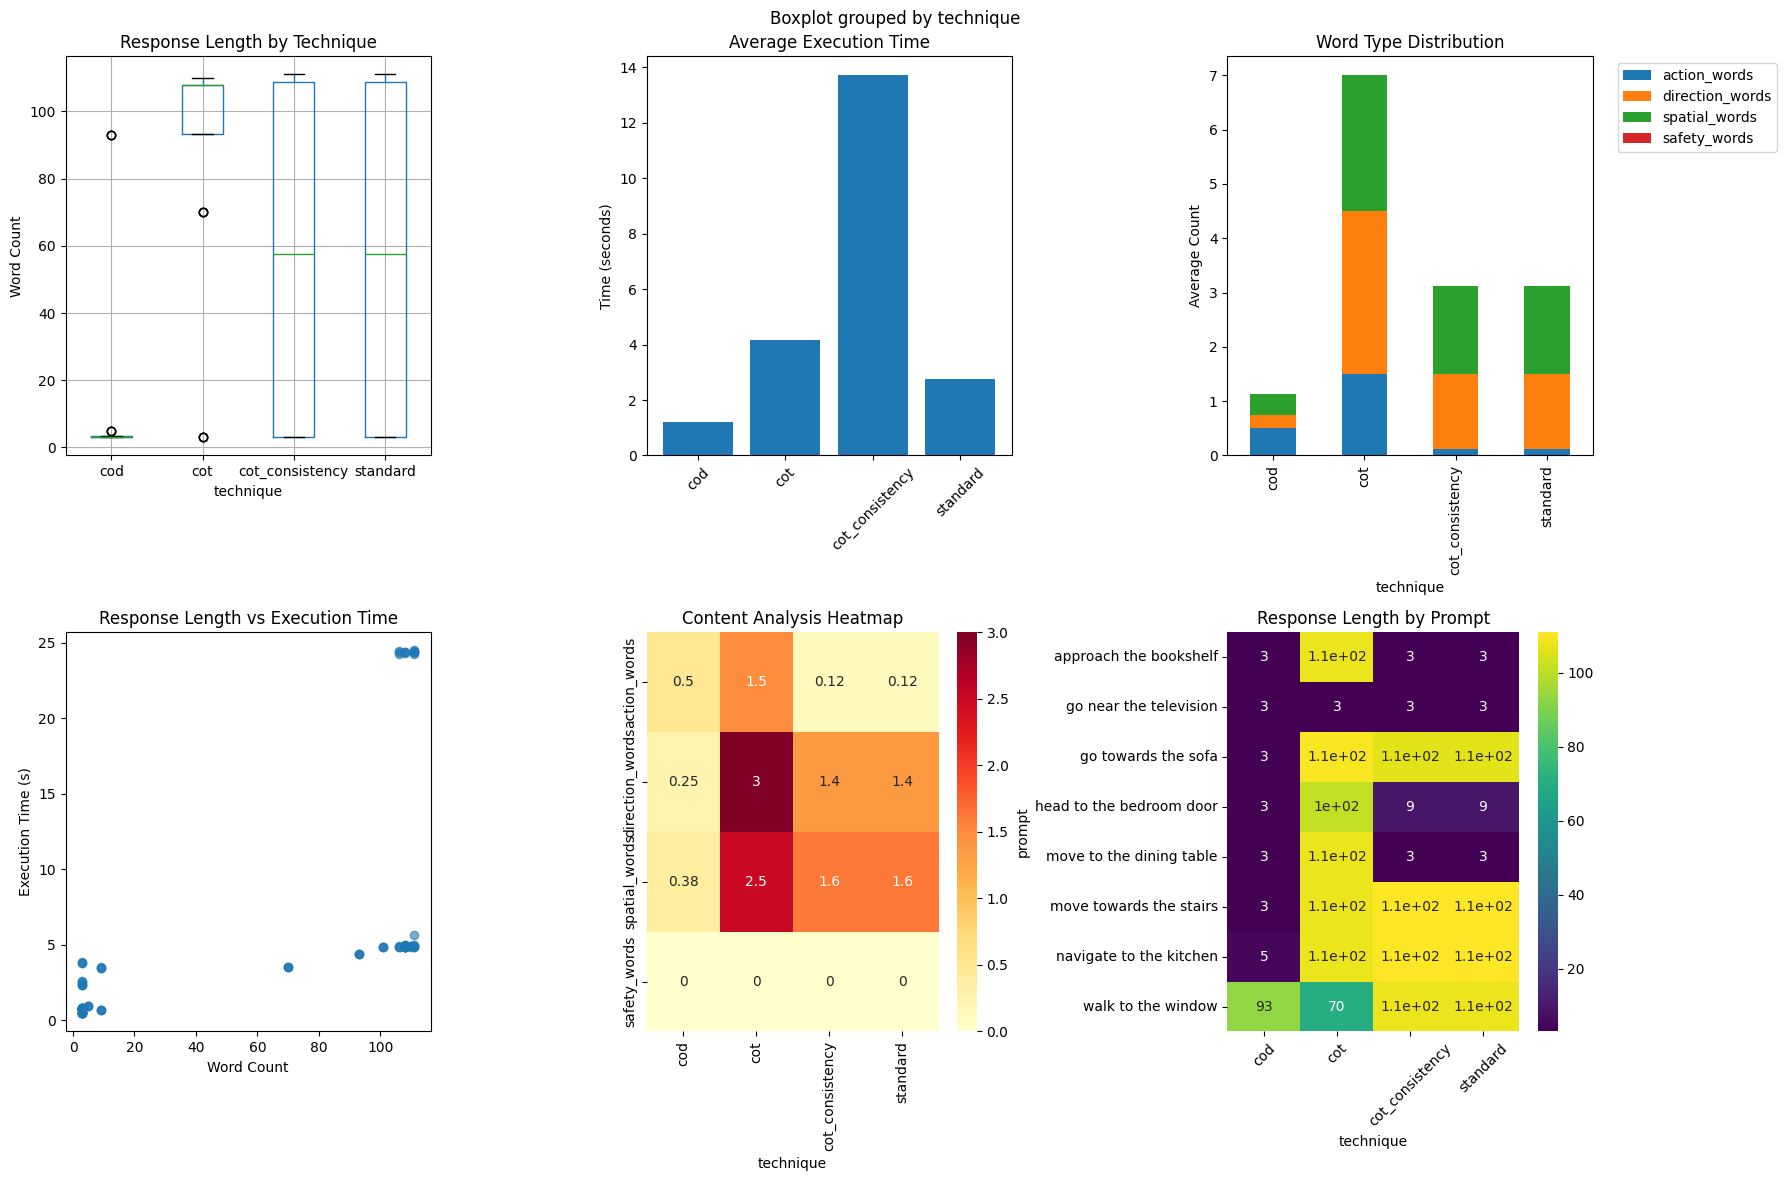


💾 Real results saved to 'real_magma_results_20250607_155324.csv'
📊 Total genuine tests: 96

📝 REAL DATA SUMMARY FOR ACADEMIC REPORT
⚡ Fastest technique: cod
📝 Most verbose: cot
🎯 Most concise: cod
📈 Word count range: 3 - 111
⏱️  Time range: 0.45s - 24.47s


In [5]:
results, char_stats, time_stats = conduct_real_study('/content/appr.jpg', trials=3)

🎯  MAGMA-8B NAVIGATION STUDY
📸 Using your uploaded image
🔬 Generating GENUINE performance data with Hugging Face
✅ Loaded image: /content/aaa1.jpg
   Image size: (6016, 4016)
🚀 Loading Magma-8B model from Hugging Face...


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of MagmaForCausalLM were not initialized from the model checkpoint at microsoft/Magma-8B and are newly initialized: ['vision_tower.clip_vision_model.head.proj.weight', 'vision_tower.clip_vision_model.trunk.head.norm.bias', 'vision_tower.clip_vision_model.trunk.head.norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded successfully on cuda
🧪 Starting REAL Navigation Performance Tests...
Testing 8 prompts × 4 techniques × 3 trials

🎯 Testing prompt: 'navigate to the kitchen'
  ⚙️  STANDARD... 

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:86: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


✓✓✓ Avg words: 7.0 (3/96)
  ⚙️  COT... ✓✓✓ Avg words: 73.0 (6/96)
  ⚙️  COD... ✓✓✓ Avg words: 3.0 (9/96)
  ⚙️  COT_CONSISTENCY...   Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓ Avg words: 7.0 (12/96)

🎯 Testing prompt: 'go towards the sofa'
  ⚙️  STANDARD... ✓✓✓ Avg words: 3.0 (15/96)
  ⚙️  COT... ✓✓✓ Avg words: 105.0 (18/96)
  ⚙️  COD... ✓✓✓ Avg words: 3.0 (21/96)
  ⚙️  COT_CONSISTENCY...   Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Generated sample 4/5
  Generated sample 5/5
✓  Generated sample 1/5
  Generated sample 2/5
  Generated sample 3/5
  Ge

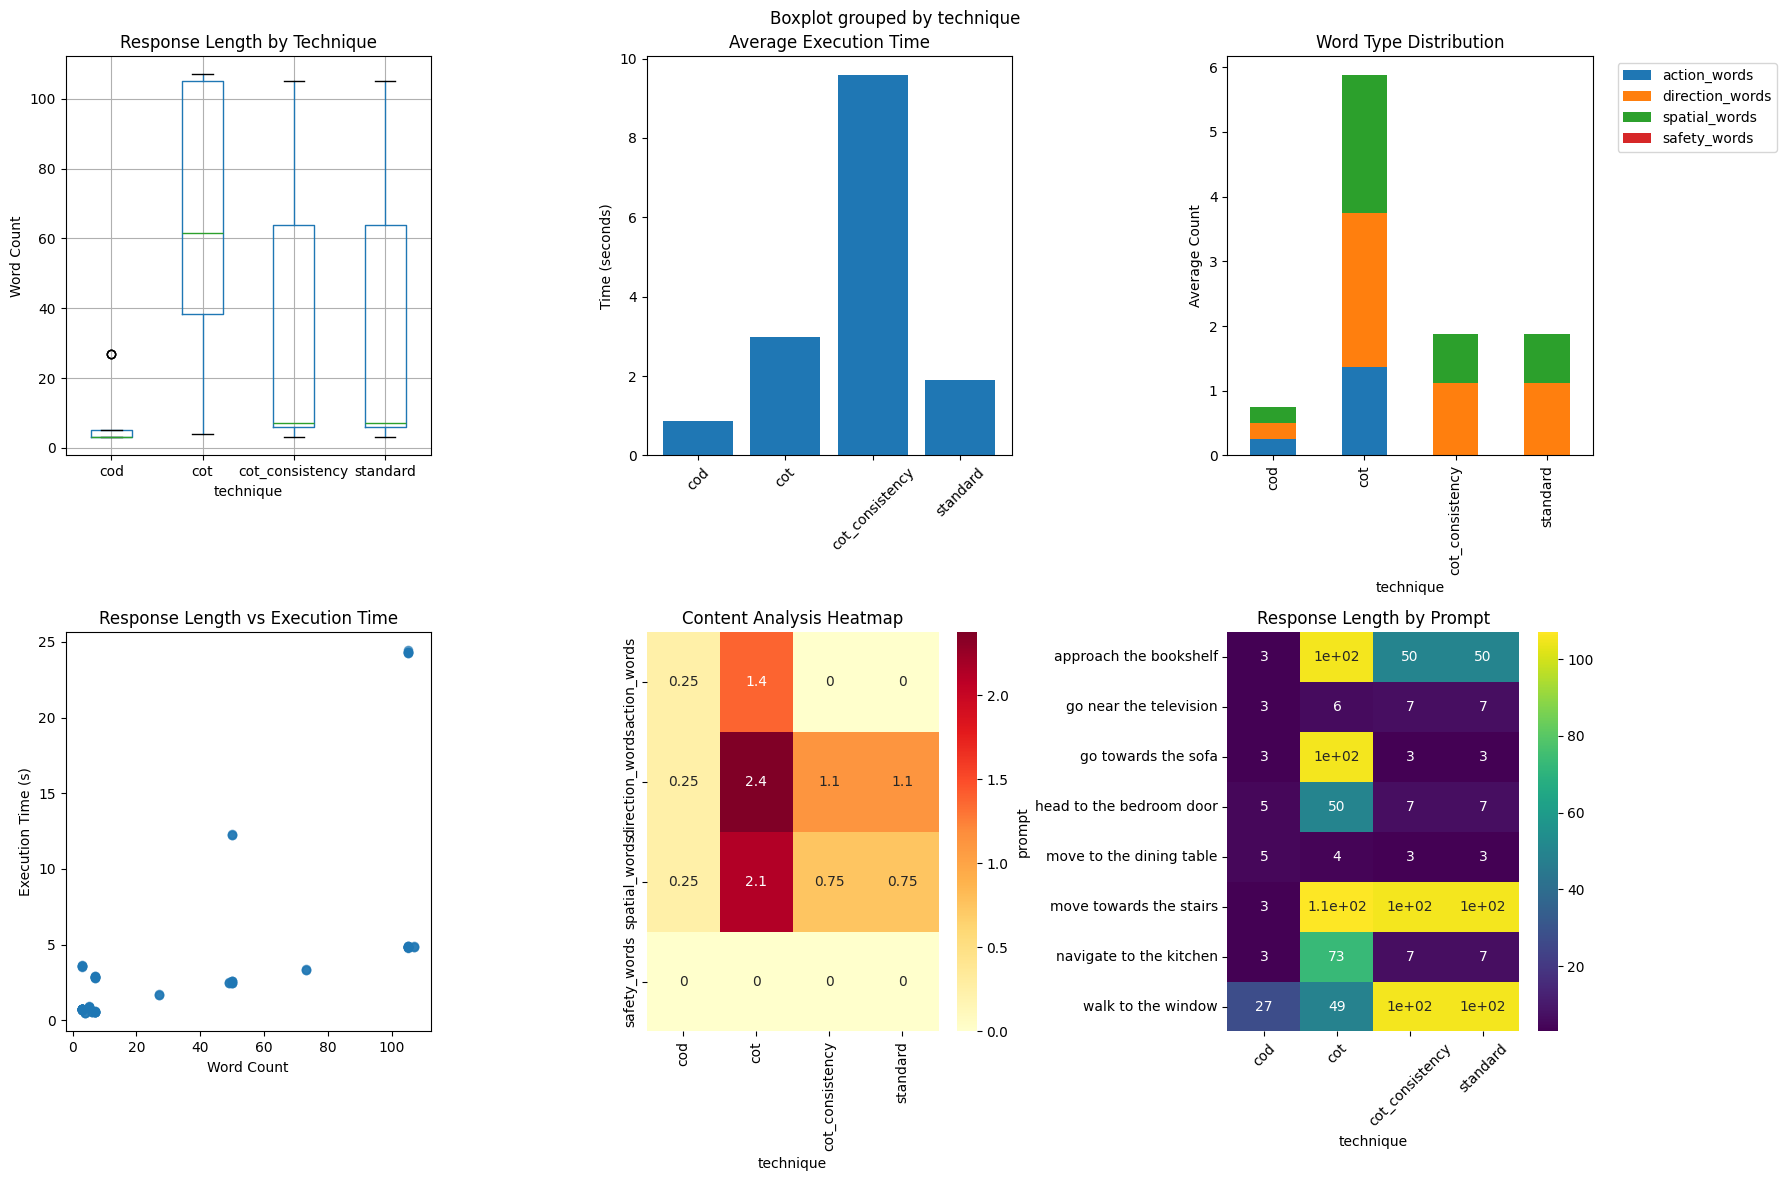


💾 Real results saved to 'Magma_results_20250607_161513.csv'
📊 Total genuine tests: 96

📝  DATA SUMMARY FOR ACADEMIC REPORT
⚡ Fastest technique: cod
📝 Most verbose: cot
🎯 Most concise: cod
📈 Word count range: 3 - 107
⏱️  Time range: 0.45s - 24.43s


In [7]:
results, char_stats, time_stats = conduct_real_study('/content/aaa1.jpg', trials=3)